In [1]:
%matplotlib inline


Test for an education/gender interaction in wages
==================================================

Wages depend mostly on education. Here we investigate how this dependence
is related to gender: not only does gender create an offset in wages, it
also seems that wages increase more with education for males than
females.

Does our data support this last hypothesis? We will test this using
statsmodels' formulas
(http://statsmodels.sourceforge.net/stable/example_formulas.html).




Load and massage the data



In [3]:
import pandas

import urllib
import os

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# EDUCATION: Number of years of education
# SEX: 1=Female, 0=Male
# WAGE: Wage (dollars per hour)
data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, names=['education', 'gender', 'wage'],
                       usecols=[0, 2, 5],
                       )

# Convert genders to strings (this is particulary useful so that the
# statsmodels formulas detects that gender is a categorical variable)
import numpy as np
data['gender'] = np.choose(data.gender, ['male', 'female'])

# Log-transform the wages, because they typically are increased with
# multiplicative factors
data['wage'] = np.log10(data['wage'])

/home/brian/anaconda3_1/lib/python3.6/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


simple plotting



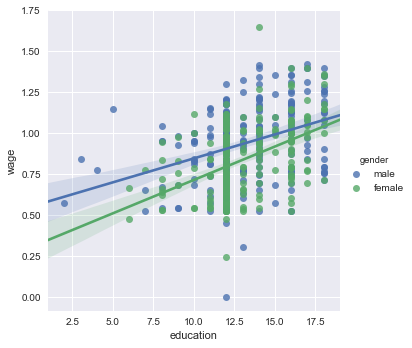

In [5]:
import seaborn

# Plot 2 linear fits for male and female.
seaborn.lmplot(y='wage', x='education', hue='gender', data=data)

In [9]:
data.head()

,education,gender,wage
0,12,male,0.971276
1,10,male,0.812913
2,12,female,0.525045
3,12,male,0.676694
4,14,male,0.949390


statistical analysis



In [8]:
import statsmodels.formula.api as sm

# Note that this model is not the plot displayed above: it is one
# joined model for male and female, not separate models for male and
# female. The reason is that a single model enables statistical testing
result = sm.ols(formula='wage ~ education + gender', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     60.70
Date:                Sun, 06 May 2018   Prob (F-statistic):           2.51e-24
Time:                        22:52:09   Log-Likelihood:                 85.372
No. Observations:                 503   AIC:                            -164.7
Df Residuals:                     500   BIC:                            -152.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.3956      0.048      8.

The plots above highlight that there is not only a different offset in
wage but also a different slope

We need to model this using an interaction



In [10]:
result = sm.ols(formula='wage ~ education + gender + education * gender',
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     41.45
Date:                Sun, 06 May 2018   Prob (F-statistic):           6.27e-24
Time:                        22:53:53   Log-Likelihood:                 86.657
No. Observations:                 503   AIC:                            -165.3
Df Residuals:                     499   BIC:                            -148.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

Looking at the p-value of the interaction of gender and education, the
data does not support the hypothesis that education benefits males
more than female (p-value > 0.05).



In [11]:
import matplotlib.pyplot as plt
plt.show()

In [12]:
result = sm.ols(formula='wage ~ education * gender',
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     41.45
Date:                Sun, 06 May 2018   Prob (F-statistic):           6.27e-24
Time:                        23:04:17   Log-Likelihood:                 86.657
No. Observations:                 503   AIC:                            -165.3
Df Residuals:                     499   BIC:                            -148.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               